### Average over multiple runs - Method 2 - Phase or amplitude noise 
Plot the emittance growth in the presence of phase or amplitude noise - PN and AN respectively. The simulation for each set of parameters is repeated multiple times. The slope of the emittance growth for each run was extracted via linear fit. Then the mean and the standard deviation of these slopes were computed over all turns. The normalised emittance is used here.

In [38]:
import csv
import numpy as np
import matplotlib.pyplot as plt

#### Plotting paramerters

In [39]:
params = {'legend.fontsize': 20,
          'figure.figsize': (9.5, 8.5),
          'axes.labelsize': 27,
          'axes.titlesize': 23,
          'xtick.labelsize': 27,
          'ytick.labelsize': 27,
          'image.cmap': 'jet',
          'lines.linewidth': 1,
          'lines.markersize': 5,
          'font.family': 'sans-serif'}

plt.rc('text', usetex=False)
plt.rc('font', family='serif')
plt.rcParams.update(params)

#### 1) Load the data
a) Give the paths to the data in /afs/.

b) Load the values of the transverse emittance in a dictionary.

In [42]:
n_runs = 30 # number of runs that the simulation was repeated
n_turns = int(1e5)            # number of cycles to run the simulation for
decTurns = int(100)           # how often to record data
circumference  = 6911.5623 # [m]
f_rev           = 299792458/circumference  # [Hz] The revolution frequency of the machine 
type_of_noise = 'AN'

In [44]:
path_to_data = '/afs/cern.ch/work/n/natriant/private/pyheadtail_example_crabcavity/'
name_template = 'AN_mytest'

In [45]:
# phase noise
ex_dict_pn = {} # type: dictionary
ey_dict_pn = {}

for run in range(n_runs):
    temp_name = 'run{}'.format(run+1) # the suffix of the name of the current study
    # A. load the turn by turn data in a dictionary
    meanX, meanY, meanXsq, meanYsq, emitX, emitY = np.loadtxt(path_to_data+name_template+'{}'.format(run+1)+'/file.txt', delimiter = ",", unpack = True)
    # B. Create a different list for each run and save the emittance values
    ex_dict_pn[temp_name] = emitX 
    ey_dict_pn[temp_name] = emitY

In [46]:
separationTime = 1 / f_rev * decTurns #There are decTurns revolutions before each recording of data
tspan = (np.arange(n_turns / decTurns) + 1.0) * separationTime #total time spanned by the simulation

#### 2) Plot the emittance evolution for every run
In the command plot choose which one of the dictionaries:
- ex_dict_pn[temp_name] 
- ey_dict_pn[temp_name]

you want to study.

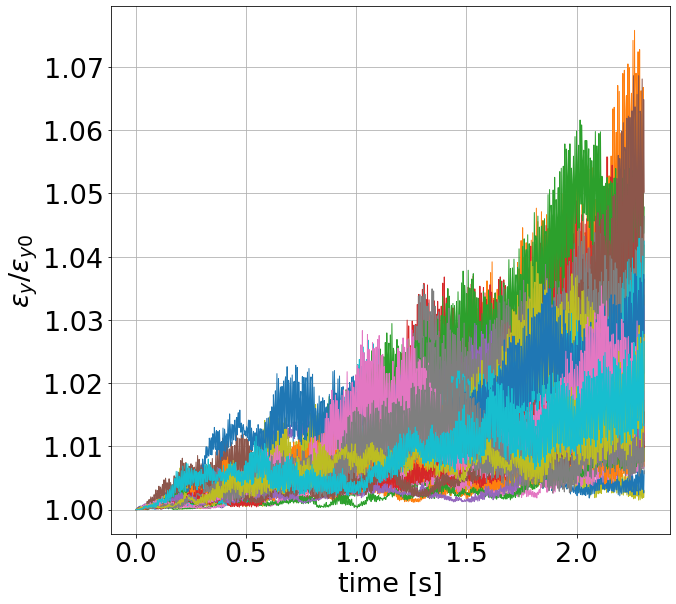

In [47]:
for run in range(n_runs):
    temp_name = 'run{}'.format(run+1) # the suffix of the name of the current study
    plt.plot(tspan, np.array(ex_dict_pn[temp_name])/ex_dict_pn[temp_name][0], c='C{}'.format(run))
    plt.plot(1,1,  label = 'run {}'.format(run+1), c='C{}'.format(run), linewidth = 3) 
    plt.xlabel('time [s]')
    plt.ylabel(r'$\epsilon_x / \epsilon_{x0}  $')
    #plt.legend(loc=0)
plt.grid()    
plt.tight_layout()
savefig = False
if savefig:
    plt.savefig('H_270GeV_SPS_noCC_{}1e-8_VRF2_37MV_1e5Nb_1e5turns_10runs.png'.format(type_of_noise))

#### 7) Calculate the emittance growth for each run rate via a linear fit
- Polynomial fit. The degree of the fitting polynomial is 1. 
- V plane only and phase noise only, if otherwise choose the apropriate dictionary from step 1.

    - ex_dict_pn[temp_name] 
    - ey_dict_pn[temp_name]


In [34]:
m_dict = []
b_dict = []
err_dict = []
for run in range(n_runs):
    temp_name = 'run{}'.format(run+1)
    # linear fit
    [m, b], cov = np.polyfit(tspan, ex_dict_pn[temp_name], 1, cov=True)
    # compute the error of the gradient of the fit slope
    err= np.sqrt(np.diag(cov))
    m_dict.append(m)
    b_dict.append(b)
    err_dict.append(err)

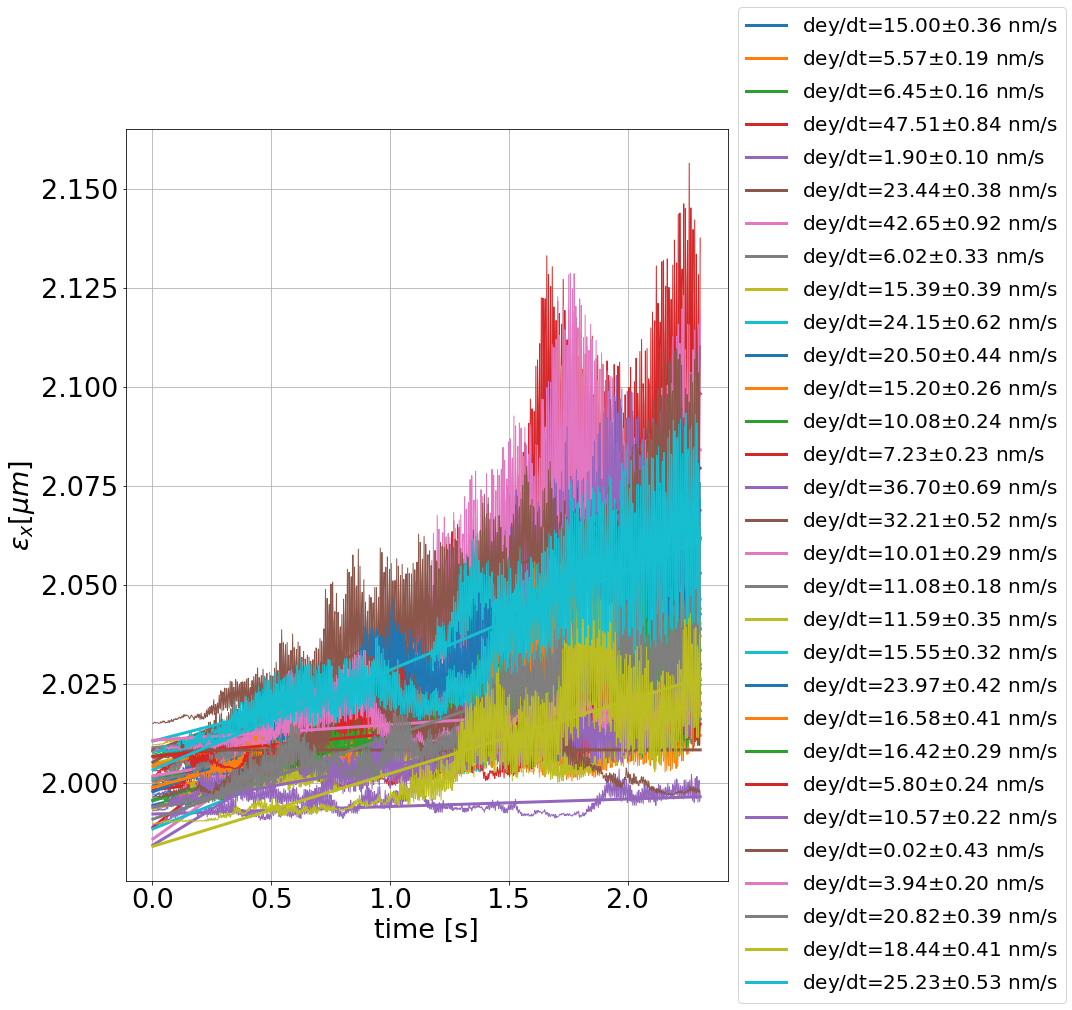

In [36]:
fig, ax = plt.subplots(1,1,figsize=(15,14))
for run in range(n_runs):
    temp_name = 'run{}'.format(run+1)
    ax.plot(tspan, np.array(ex_dict_pn[temp_name])*1e6, c='C{}'.format(run))
    ax.plot(tspan, (m_dict[run]*tspan+b_dict[run])*1e6, c = 'C{}'.format(run), label='dey/dt={0:.2f}'.format(m_dict[run]*1e9)+'$\pm$'+'{0:.2f} nm/s'.format(err_dict[run][0]*1e9), linewidth = 3)
    
    ax.set_xlabel('time [s]')
    ax.set_ylabel(r'$\epsilon_x [\mu m]$')
    #plt.legend(loc=0)
    
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width*1, box.height])

    # Put a legend to the right of the current axis
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    
    
plt.grid()    
plt.tight_layout()
savefig = False
if savefig:
    plt.savefig('H_270GeV_SPS_noCC_{}1e-8_VRF2_37MV_1e5Nb_1e5turns_30runs_method_2.png'.format(type_of_noise))

#### 8) Compute the mean and the standard deviation of these slopes were computed over all turns.

In [12]:
growth_rate = np.mean(m_dict)
standard_deviation = np.std(m_dict)

In [13]:
print('The emittance growth rate is computed: {}'.format(growth_rate*1e9)+'+-'+'{} nm/s'.format(standard_deviation*1e9))

The emittance growth rate is computed: 22.70062878982374+-14.323489799244678 nm/s
